In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('P:\\insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


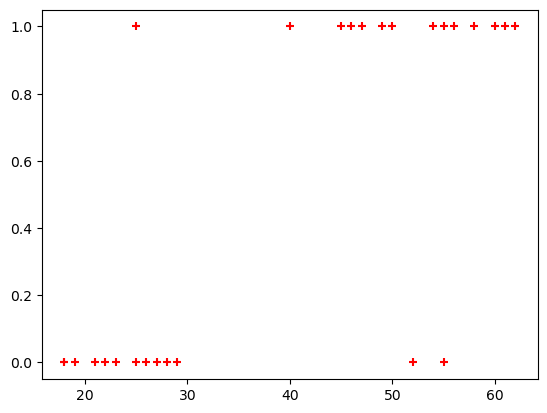

In [31]:
plt.scatter(df.age, df.bought_insurance, marker = '+', color = 'red')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.8)

In [8]:
X_test

,age
22,40
23,45
15,55
8,62
25,54
20,21


In [9]:
X_train

,age
21,26
14,49
17,58
2,47
0,22
18,19
24,50
11,28
3,52
7,60


In [10]:
y_train

21    0
14    1
17    1
2     1
0     0
18    0
24    1
11    0
3     0
7     1
9     1
19    0
16    1
12    0
1     0
13    0
5     1
10    0
26    0
4     1
6     0
Name: bought_insurance, dtype: int64

In [11]:
y_test

22    1
23    1
15    1
8     1
25    1
20    0
Name: bought_insurance, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_predicted = model.predict(X_test)

In [17]:
model.predict_proba(X_test)

array([[0.55694091, 0.44305909],
       [0.40857663, 0.59142337],
       [0.17263449, 0.82736551],
       [0.08278294, 0.91721706],
       [0.19041001, 0.80958999],
       [0.92438465, 0.07561535]])

In [18]:
model.score(X_test, y_test)

0.8333333333333334

In [19]:
y_predicted

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [20]:
model.intercept_

array([-5.01762528])

In [21]:
model.coef_

array([[0.11972173]])

In [25]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [26]:
def prediction_function(age):
    z = 0.11972173 * age + -5.01762528
    y = sigmoid(z)
    return y

In [27]:
age = 35
prediction_function(age)

0.3042025723160598

In [28]:
age2 = 18
prediction_function(age2)

0.05403190483864709

In [47]:
age_range = np.linspace(df.age.min(), df.age.max(), 100)

# Assuming you have fitted a logistic regression model to df and named it 'model'
predicted_probs = model.predict_proba(age_range.reshape(-1, 1))[:, 1]

P:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


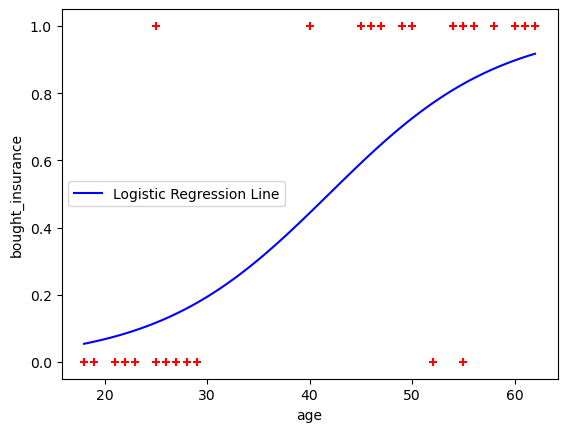

In [48]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.plot(age_range, predicted_probs, linestyle='-', color='blue', label='Logistic Regression Line')
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.legend()
plt.show()